In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

### OpenAI Gym

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observation space: Box(2,)
Action space: Discrete(3)


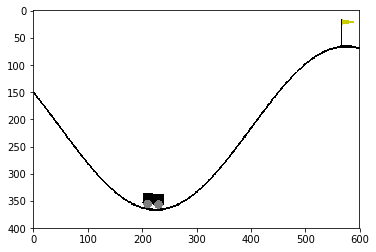

In [2]:
import gym
env = gym.make("MountainCar-v0")

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it ~~for now~~.

In [3]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.47078874  0.        ]


In [4]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the riht slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.47018316  0.00060558]
reward: -1.0
is game over?: False


### Play with it

Below is the code that drives the car to the right. 

However, it doesn't reach the flag at the far right due to gravity. 

__Your task__ is to fix it. Find a strategy that reaches the flag. 

You're not required to build any sophisticated algorithms for now, feel free to hard-code :)

_Hint: your action at each step should depend either on __t__ or on __s__._

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>


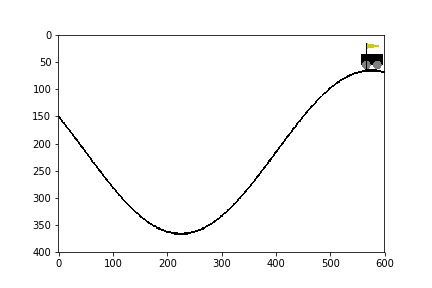

time 0 action 0 postion -0.4910457140721402 velocity -0.0012531118730910269
time 1 action 0 postion -0.49354258600564366 velocity -0.0024968719335034632
time 2 action 0 postion -0.4972645740252855 velocity -0.0037219880196418696
time 3 action 0 postion -0.502183863167594 velocity -0.004919289142308452
time 4 action 0 postion -0.5082636536914117 velocity -0.006079790523817694
time 5 action 0 postion -0.5154584170629636 velocity -0.007194763371551876
time 6 action 0 postion -0.5237142270551868 velocity -0.008255809992223164
time 7 action 0 postion -0.5329691711615006 velocity -0.009254944106313816
time 8 action 0 postion -0.5431538465567876 velocity -0.010184675395286967
time 9 action 0 postion -0.5541919430315019 velocity -0.011038096474714341
time 10 action 0 postion -0.5660009127408777 velocity -0.011808969709375863
time 11 action 0 postion -0.578492723389237 velocity -0.012491810648359193
time 12 action 0 postion -0.5915746878197318 velocity -0.013081964430494857
time 13 action 0 pos

time 112 action 2 postion -0.7428918697129144 velocity -0.03809533507613684
time 113 action 2 postion -0.7784586044789837 velocity -0.03556673476606927
time 114 action 2 postion -0.8112947552789938 velocity -0.03283615080001007
time 115 action 2 postion -0.841231271994821 velocity -0.029936516715827234
time 116 action 2 postion -0.8681300449396359 velocity -0.026898772944814905
time 117 action 2 postion -0.8918809588616903 velocity -0.023750913922054445
time 118 action 2 postion -0.9123983846316 velocity -0.02051742576990963
time 119 action 2 postion -0.9296174613346231 velocity -0.01721907670302315
time 120 action 2 postion -0.9434904641509425 velocity -0.01387300281631942
time 121 action 2 postion -0.9539834896649759 velocity -0.010493025514033444
time 122 action 2 postion -0.961073629526274 velocity -0.0070901398612980586
time 123 action 2 postion -0.9647467511763784 velocity -0.0036731216501044816
time 124 action 2 postion -0.9649959626971809 velocity -0.0002492115208025179
time 12

In [6]:

# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(t,s):
    position = s[0]
    velocity = s[1]
    
    if t < 30:
        return actions['left']
    
    if velocity < 0 and position > 0:
        return actions['left']
    
    return actions['right']


for t in range(TIME_LIMIT):
    
    # change the line below to reach the flag
    action = policy(t,s)
    s, r, done, _ = env.step(action)
    print("time",t,"action",action,'postion',s[0],"velocity",s[1])
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")

In [7]:
assert s[0] > 0.47
print("You solved it!")

You solved it!
